In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



In [20]:
# Load the dataset
df = pd.read_csv("tcga_brca_for_python_svm.csv")
df

,sampleID,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,PTRF,BCL6B,GSTK1,SELP,SELS,PAM50_subtype,age,tumor_stage,vital_status,tissue_source_site
0,TCGA-A1-A0SB-01,10.817383,5.988629,0.527471,11.819971,11.305967,10.006388,12.981429,2.855021,0.018515,...,13.353861,5.866244,10.584220,4.050856,9.469746,Normal,70,Stage I,LIVING,A1
1,TCGA-A1-A0SD-01,9.175583,2.440529,-0.009129,11.794771,11.012267,10.541788,12.813829,4.691521,0.018515,...,12.678761,9.004244,10.795320,8.775456,10.542546,LumA,59,Stage IIA,LIVING,A1
2,TCGA-A1-A0SE-01,9.727783,3.345329,-0.009129,11.329871,11.260867,10.402088,12.537129,4.256421,0.018515,...,12.631761,8.101344,11.093320,7.894856,9.813246,LumA,56,Stage I,LIVING,A1
3,TCGA-A1-A0SF-01,9.867983,4.860229,-0.009129,11.489671,11.069167,10.291088,12.766629,3.459521,0.018515,...,12.502861,8.099944,11.562420,7.792056,10.246746,LumA,54,Stage IIA,LIVING,A1
4,TCGA-A1-A0SG-01,10.129683,1.606929,-0.009129,11.826371,11.090067,10.244088,12.731429,3.113121,0.462115,...,12.104061,8.079844,11.439420,7.584156,9.928246,LumA,61,Stage IIB,LIVING,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,TCGA-GM-A2DM-01,9.418331,-0.064974,-0.014434,11.949302,11.373861,10.636509,13.083587,1.904896,-0.028458,...,11.203511,7.079998,11.159065,4.801197,9.768959,LumA,57,Stage IIA,LIVING,GM
837,TCGA-GM-A2DN-01,9.969331,2.325226,-0.014434,11.556102,10.972961,10.617909,12.413887,4.368396,-0.028458,...,12.347311,7.854198,11.283765,7.696297,10.112459,LumA,58,Stage IIA,LIVING,GM
838,TCGA-GM-A2DO-01,9.978331,3.236326,1.968466,11.764702,10.174161,10.303809,12.535487,5.371596,0.960142,...,10.673211,7.130098,12.265765,7.284497,10.354859,LumB,54,Stage I,LIVING,GM
839,TCGA-GM-A3NY-01,10.618331,3.401226,-0.014434,11.561702,11.366061,10.207009,12.821187,5.108496,-0.028458,...,12.105311,8.456598,11.284765,5.045397,10.417259,LumA,72,Stage IIB,LIVING,GM


In [21]:
# Shape of Dataset
print("Shape of dataset:", df.shape)
print("Columns:", df.columns[:10])

Shape of dataset: (841, 20536)
Columns: Index(['sampleID', 'ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13',
       'GTF2IP1', 'REM1', 'MTVR2'],
      dtype='object')


In [39]:
# Extract age and subtype columns
df_PAM50 = df[['age', 'PAM50_subtype']].copy()
df_PAM50

,age,PAM50_subtype
0,70,Normal
1,59,LumA
2,56,LumA
3,54,LumA
4,61,LumA
...,...,...
836,57,LumA
837,58,LumA
838,54,LumB
839,72,LumA


In [40]:
# Create age groups
df_PAM50['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
df_PAM50

,age,PAM50_subtype,age_group
0,70,Normal,"(60, 70]"
1,59,LumA,"(50, 60]"
2,56,LumA,"(50, 60]"
3,54,LumA,"(50, 60]"
4,61,LumA,"(60, 70]"
...,...,...,...
836,57,LumA,"(50, 60]"
837,58,LumA,"(50, 60]"
838,54,LumB,"(50, 60]"
839,72,LumA,"(70, 80]"



Summary Table:
 PAM50_subtype  Basal  Her2  LumA  LumB  Normal
age_group                                     
(20, 30]           1     0     7     1       0
(30, 40]          17     3    36    17       2
(40, 50]          33    14    78    35       9
(50, 60]          44    24    88    55       7
(60, 70]          24    14   128    47       5
(70, 80]          14     9    64    26       0
(80, 90]           7     3    19    10       0


/var/folders/vg/t4f1f6lx6gq7vvzntlfcm4yc0000gn/T/ipykernel_68760/665324511.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df_PAM50.groupby(['age_group', 'PAM50_subtype']).size().unstack().fillna(0).astype(int)


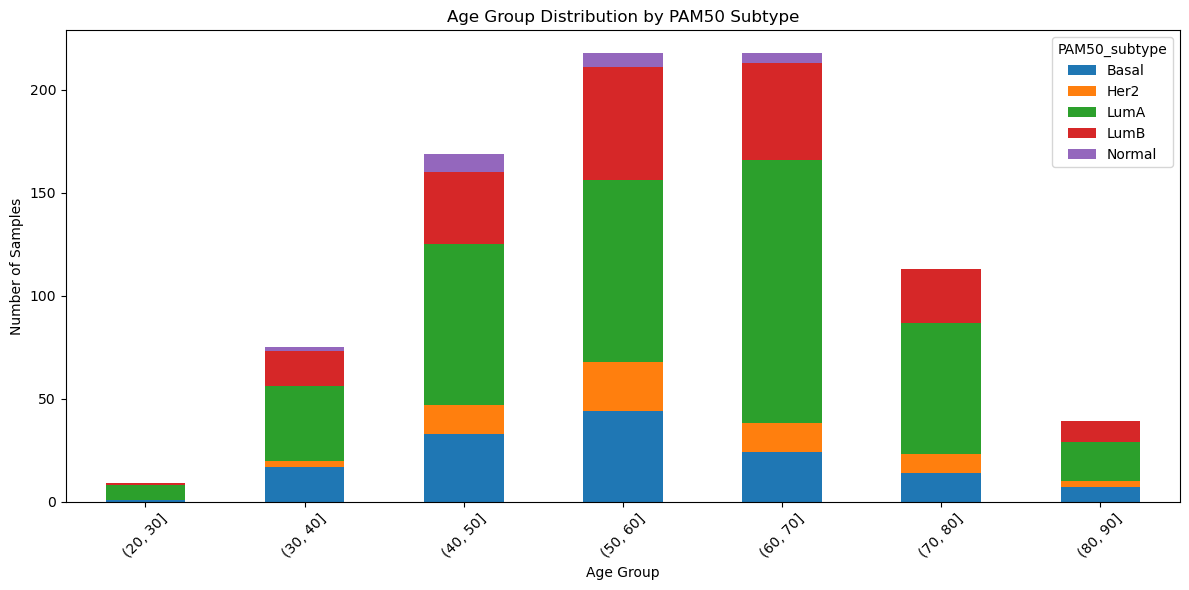

In [41]:
# Group by age group and subtype
summary_table = df_PAM50.groupby(['age_group', 'PAM50_subtype']).size().unstack().fillna(0).astype(int)
print("\nSummary Table:\n", summary_table)
summary_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age Group Distribution by PAM50 Subtype')
plt.xlabel('Age Group')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Extract age and vital_status columns
df_vital_status= df[['age', 'vital_status']].copy()
df_vital_status

,age,vital_status
0,70,LIVING
1,59,LIVING
2,56,LIVING
3,54,LIVING
4,61,LIVING
...,...,...
836,57,LIVING
837,58,LIVING
838,54,LIVING
839,72,LIVING


In [57]:
# Create age groups
df_vital_status['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
df_vital_status

,age,vital_status,age_group
0,70,LIVING,"(60, 70]"
1,59,LIVING,"(50, 60]"
2,56,LIVING,"(50, 60]"
3,54,LIVING,"(50, 60]"
4,61,LIVING,"(60, 70]"
...,...,...,...
836,57,LIVING,"(50, 60]"
837,58,LIVING,"(50, 60]"
838,54,LIVING,"(50, 60]"
839,72,LIVING,"(70, 80]"



Summary Table:
 vital_status  DECEASED  LIVING
age_group                     
(20, 30]             1       8
(30, 40]            14      61
(40, 50]            22     147
(50, 60]            25     193
(60, 70]            29     189
(70, 80]            24      89
(80, 90]            11      28


/var/folders/vg/t4f1f6lx6gq7vvzntlfcm4yc0000gn/T/ipykernel_68760/3339406431.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df_vital_status.groupby(['age_group', 'vital_status']).size().unstack().fillna(0).astype(int)


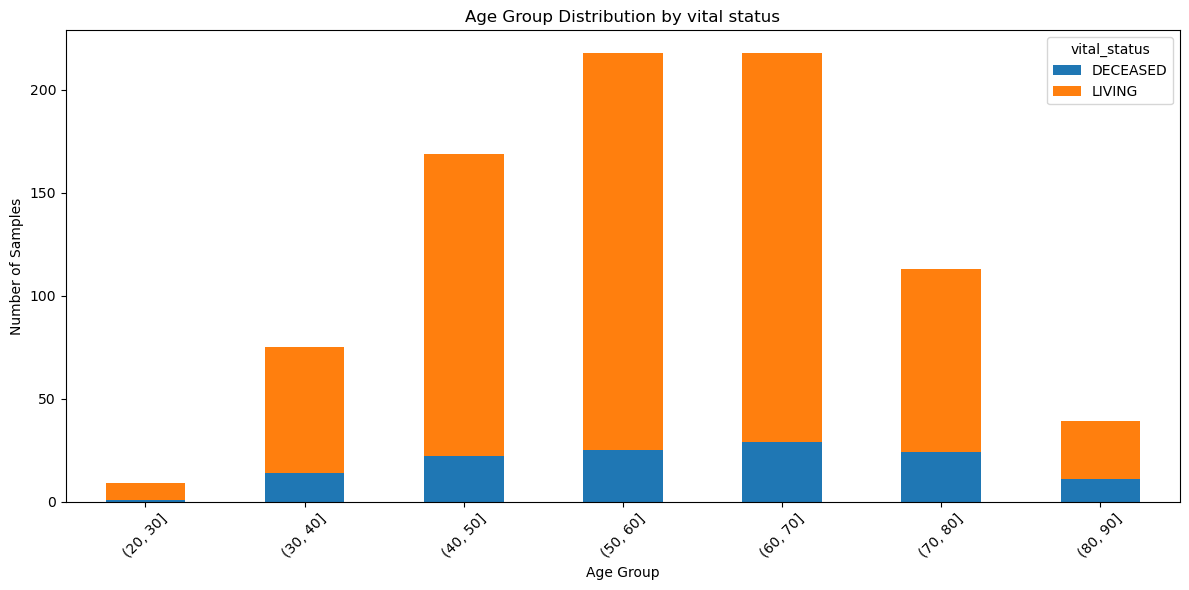

In [58]:
# Group by age group and subtype
summary_table = df_vital_status.groupby(['age_group', 'vital_status']).size().unstack().fillna(0).astype(int)
print("\nSummary Table:\n", summary_table)
summary_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age Group Distribution by vital status')
plt.xlabel('Age Group')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Extract age and vital_status columns
df_tumor_stage = df[['age', 'tumor_stage']].copy()
df_tumor_stage

,age,tumor_stage
0,70,Stage I
1,59,Stage IIA
2,56,Stage I
3,54,Stage IIA
4,61,Stage IIB
...,...,...
836,57,Stage IIA
837,58,Stage IIA
838,54,Stage I
839,72,Stage IIB


In [60]:
# Create age groups
df_tumor_stage['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
df_tumor_stage

,age,tumor_stage,age_group
0,70,Stage I,"(60, 70]"
1,59,Stage IIA,"(50, 60]"
2,56,Stage I,"(50, 60]"
3,54,Stage IIA,"(50, 60]"
4,61,Stage IIB,"(60, 70]"
...,...,...,...
836,57,Stage IIA,"(50, 60]"
837,58,Stage IIA,"(50, 60]"
838,54,Stage I,"(50, 60]"
839,72,Stage IIB,"(70, 80]"



Summary Table:
 tumor_stage  Stage I  Stage IA  Stage IB  Stage II  Stage IIA  Stage IIB  \
age_group                                                                  
(20, 30]           1         0         0         0          1          6   
(30, 40]           6         4         2         0         22         13   
(40, 50]          11        10         0         2         53         49   
(50, 60]          22        16         0         1         74         56   
(60, 70]          22        20         1         0         83         42   
(70, 80]          10         9         0         0         45         21   
(80, 90]           7         1         0         0          7          7   

tumor_stage  Stage III  Stage IIIA  Stage IIIB  Stage IIIC  Stage IV  Stage X  \
age_group                                                                       
(20, 30]             0           1           0           0         0        0   
(30, 40]             0          21           0         

/var/folders/vg/t4f1f6lx6gq7vvzntlfcm4yc0000gn/T/ipykernel_68760/374777621.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df_tumor_stage.groupby(['age_group', 'tumor_stage']).size().unstack().fillna(0).astype(int)


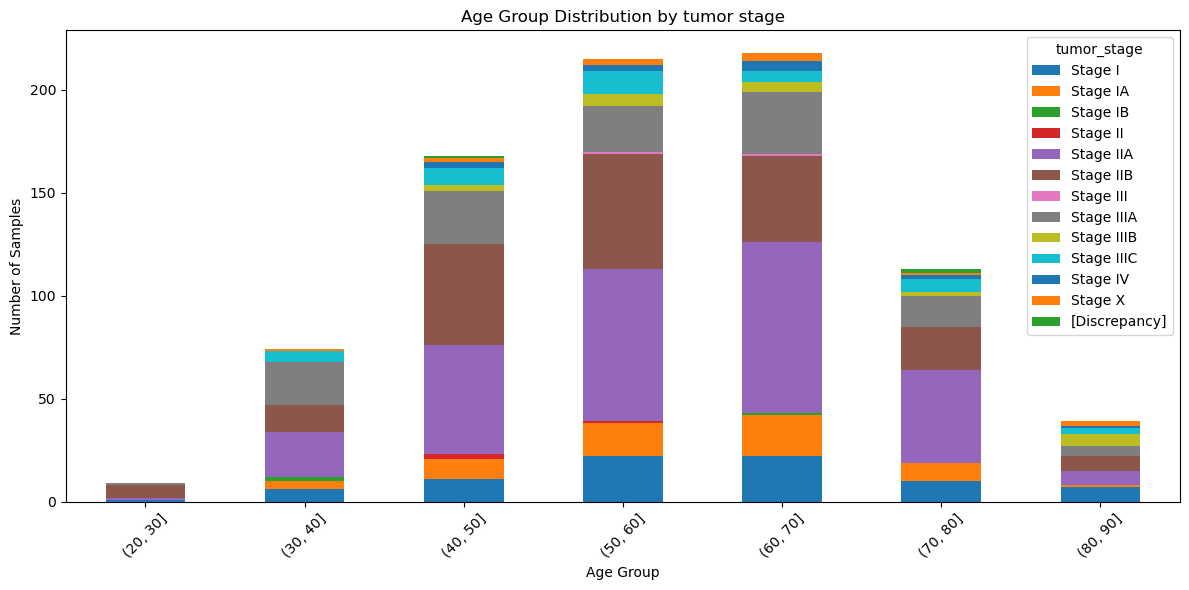

In [61]:
# Group by age group and subtype
summary_table = df_tumor_stage.groupby(['age_group', 'tumor_stage']).size().unstack().fillna(0).astype(int)
print("\nSummary Table:\n", summary_table)
summary_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age Group Distribution by tumor stage')
plt.xlabel('Age Group')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Age group vs PAM50 Subtype
pam50_summary = df_PAM50.groupby(['age_group', 'PAM50_subtype'], observed=True).size().unstack().fillna(0).astype(int)
print("\n[1] Age Group vs PAM50 Subtype:\n", pam50_summary)



[1] Age Group vs PAM50 Subtype:
 PAM50_subtype  Basal  Her2  LumA  LumB  Normal
age_group                                     
(20, 30]           1     0     7     1       0
(30, 40]          17     3    36    17       2
(40, 50]          33    14    78    35       9
(50, 60]          44    24    88    55       7
(60, 70]          24    14   128    47       5
(70, 80]          14     9    64    26       0
(80, 90]           7     3    19    10       0


In [63]:
# Age group vs Vital Status
# pam50_summary = df_PAM50.groupby(['age_group', 'PAM50_subtype'], observed=True).size().unstack().fillna(0).astype(int)

vital_summary = df_vital_status.groupby(['age_group', 'vital_status'], observed=True).size().unstack().fillna(0).astype(int)
print("\n[2] Age Group vs Vital Status:\n", vital_summary)


[2] Age Group vs Vital Status:
 vital_status  DECEASED  LIVING
age_group                     
(20, 30]             1       8
(30, 40]            14      61
(40, 50]            22     147
(50, 60]            25     193
(60, 70]            29     189
(70, 80]            24      89
(80, 90]            11      28


In [65]:
# Age group vs Tumor Stage
tumor_summary = df_tumor_stage.groupby(['age_group', 'tumor_stage']).size().unstack().fillna(0).astype(int)
print("\n[3] Age Group vs Tumor Stage:\n", tumor_summary)


[3] Age Group vs Tumor Stage:
 tumor_stage  Stage I  Stage IA  Stage IB  Stage II  Stage IIA  Stage IIB  \
age_group                                                                  
(20, 30]           1         0         0         0          1          6   
(30, 40]           6         4         2         0         22         13   
(40, 50]          11        10         0         2         53         49   
(50, 60]          22        16         0         1         74         56   
(60, 70]          22        20         1         0         83         42   
(70, 80]          10         9         0         0         45         21   
(80, 90]           7         1         0         0          7          7   

tumor_stage  Stage III  Stage IIIA  Stage IIIB  Stage IIIC  Stage IV  Stage X  \
age_group                                                                       
(20, 30]             0           1           0           0         0        0   
(30, 40]             0          21      

/var/folders/vg/t4f1f6lx6gq7vvzntlfcm4yc0000gn/T/ipykernel_68760/575330906.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tumor_summary = df_tumor_stage.groupby(['age_group', 'tumor_stage']).size().unstack().fillna(0).astype(int)


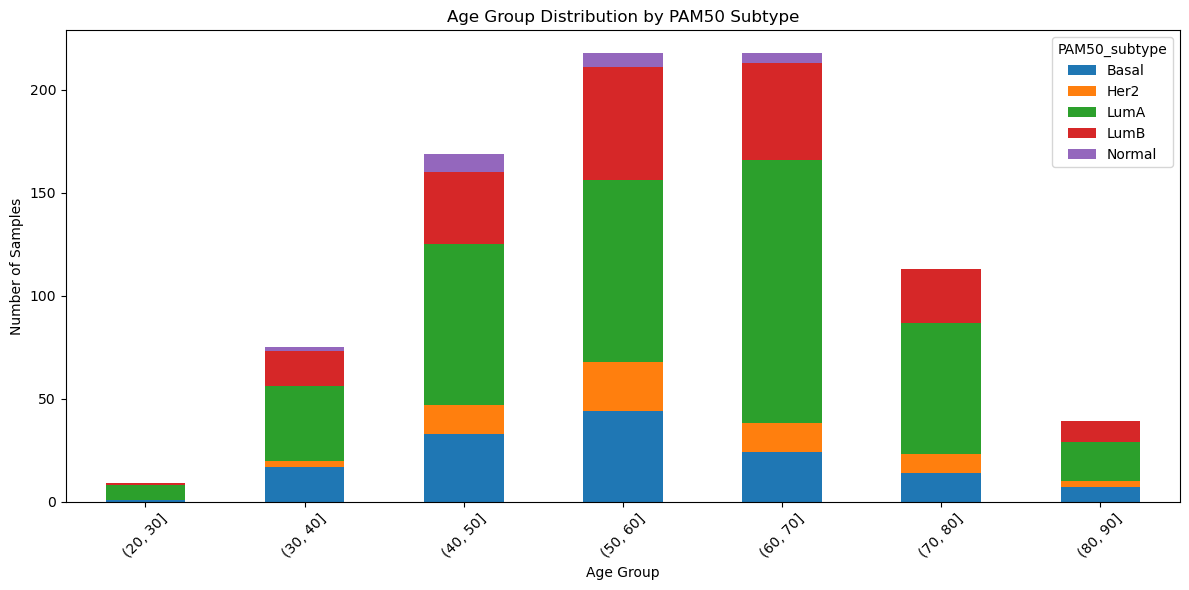

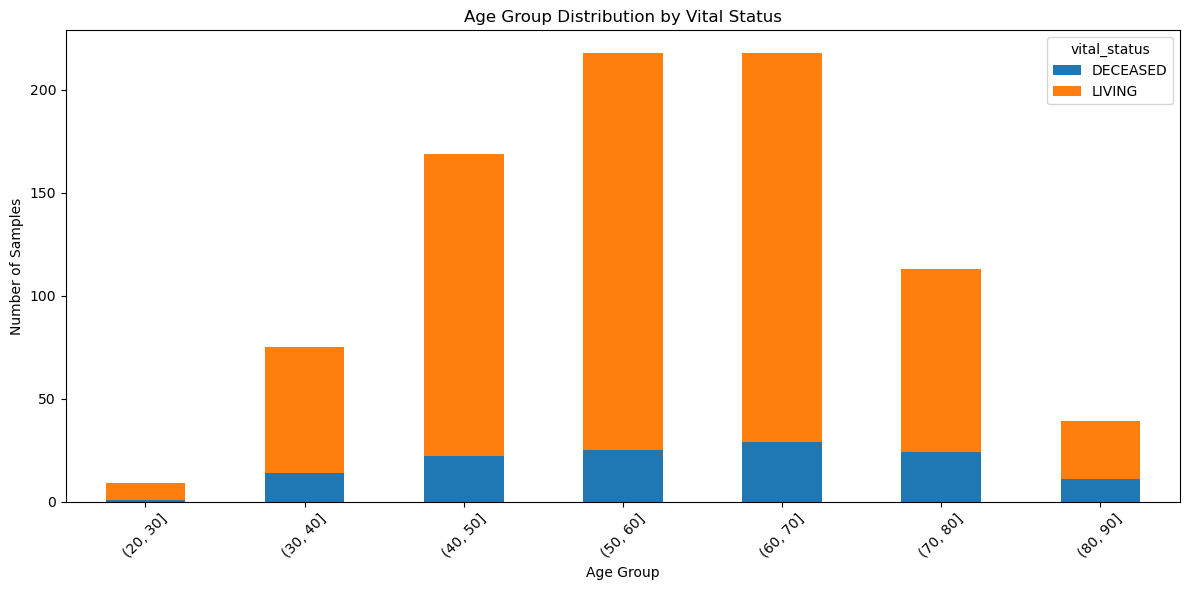

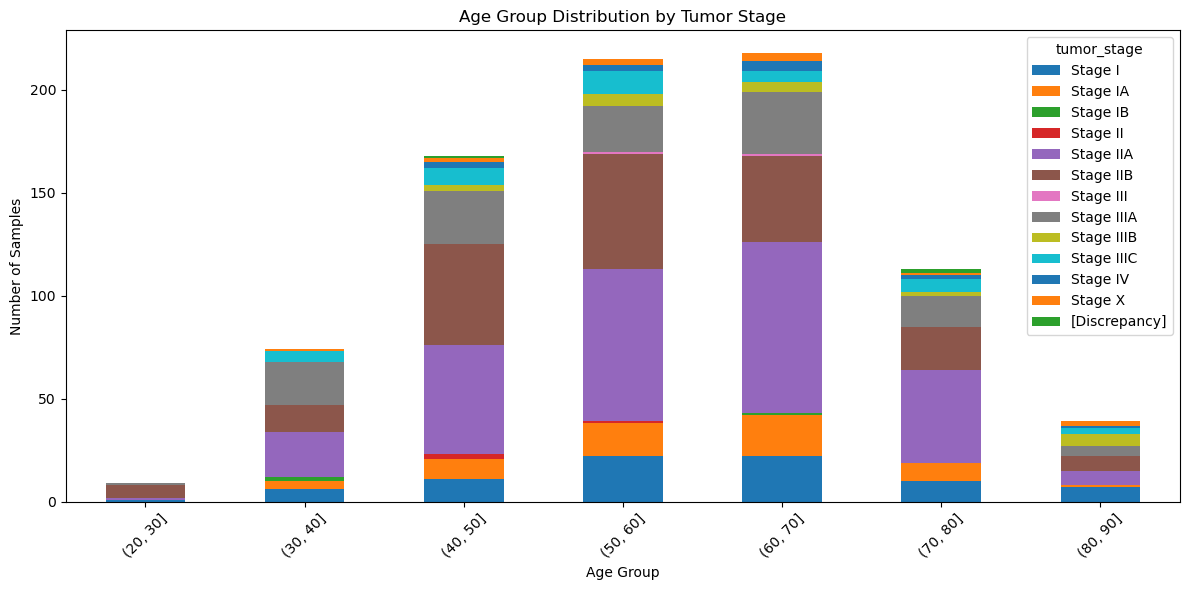

In [66]:
def plot_stacked_bar(data, title, ylabel):
    data.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(title)
    plt.xlabel('Age Group')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_stacked_bar(pam50_summary, 'Age Group Distribution by PAM50 Subtype', 'Number of Samples')
plot_stacked_bar(vital_summary, 'Age Group Distribution by Vital Status', 'Number of Samples')
plot_stacked_bar(tumor_summary, 'Age Group Distribution by Tumor Stage', 'Number of Samples')

In [67]:
# Dataset Overview
print("Shape of dataset:", df.shape)
print("\nColumn Types:\n", df.dtypes.value_counts())
print("\nPreview of dataset:\n", df.head())

Shape of dataset: (841, 20536)

Column Types:
 float64    20237
int64        294
object         5
Name: count, dtype: int64

Preview of dataset:
           sampleID  ARHGEF10L     HIF3A     RNF17      RNF10      RNF11  \
0  TCGA-A1-A0SB-01  10.817383  5.988629  0.527471  11.819971  11.305967   
1  TCGA-A1-A0SD-01   9.175583  2.440529 -0.009129  11.794771  11.012267   
2  TCGA-A1-A0SE-01   9.727783  3.345329 -0.009129  11.329871  11.260867   
3  TCGA-A1-A0SF-01   9.867983  4.860229 -0.009129  11.489671  11.069167   
4  TCGA-A1-A0SG-01  10.129683  1.606929 -0.009129  11.826371  11.090067   

       RNF13    GTF2IP1      REM1     MTVR2  ...       PTRF     BCL6B  \
0  10.006388  12.981429  2.855021  0.018515  ...  13.353861  5.866244   
1  10.541788  12.813829  4.691521  0.018515  ...  12.678761  9.004244   
2  10.402088  12.537129  4.256421  0.018515  ...  12.631761  8.101344   
3  10.291088  12.766629  3.459521  0.018515  ...  12.502861  8.099944   
4  10.244088  12.731429  3.113121  0.4

In [68]:
# Missing Value Analysis
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing)


Missing Values:
 tumor_stage    5
dtype: int64


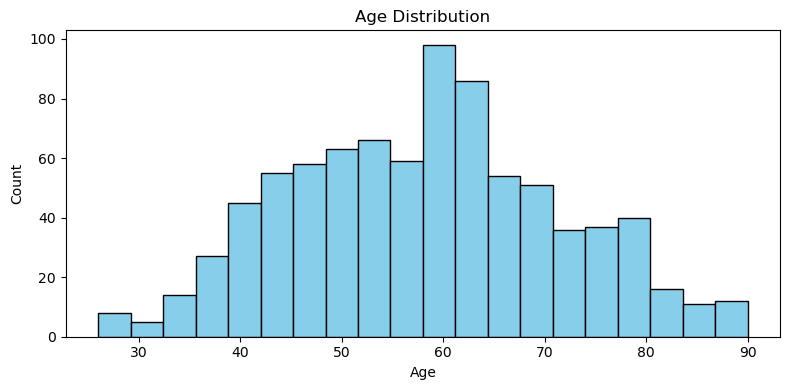

In [69]:
# Age Distribution
plt.figure(figsize=(8, 4))
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()

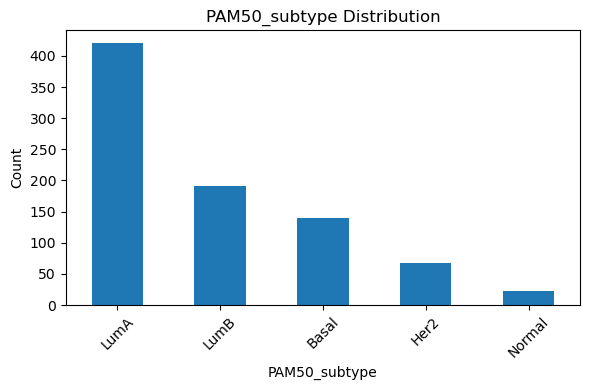

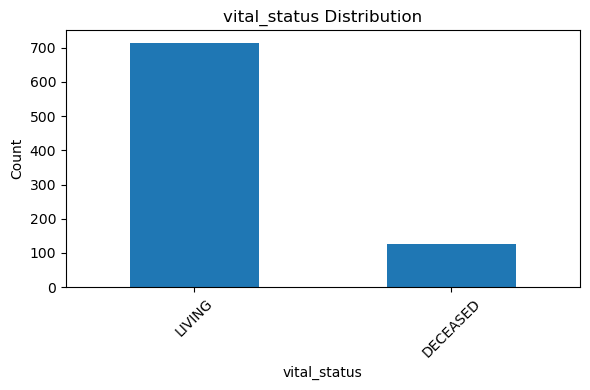

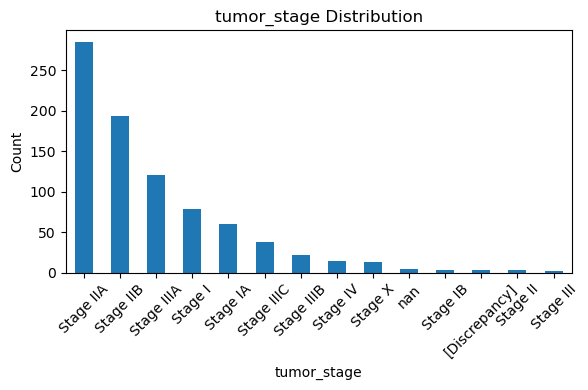

In [70]:
# Categorical Distributions
categorical_vars = ['PAM50_subtype', 'vital_status', 'tumor_stage']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    df[var].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'{var} Distribution')
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

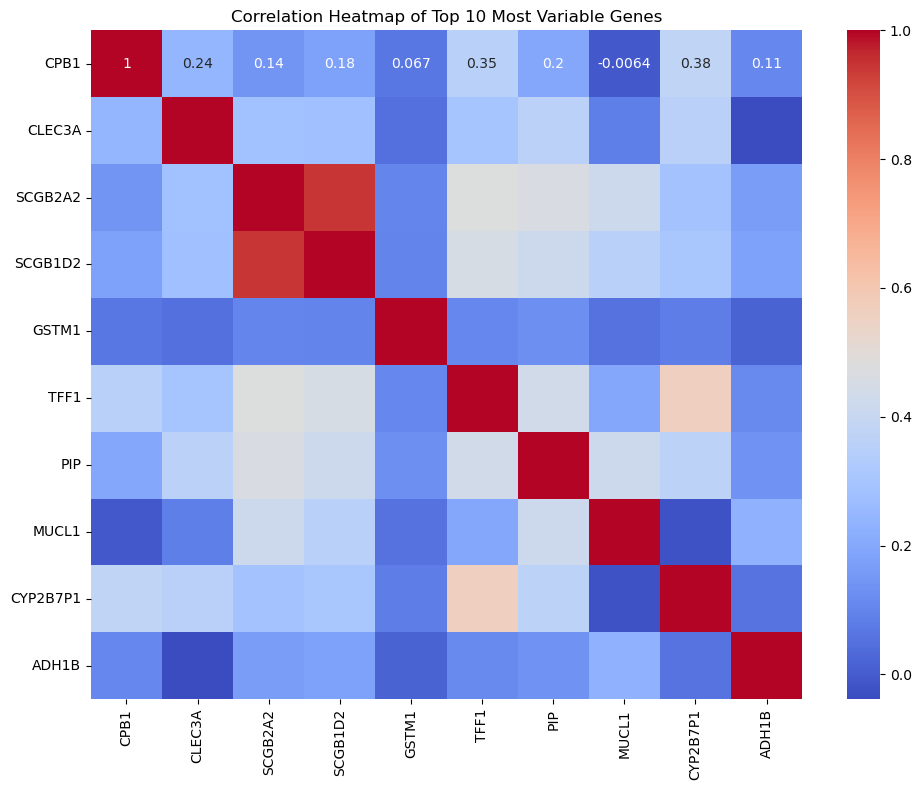

In [71]:
# Correlation Heatmap of Top 10 Most Variable Genes
numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()

# Drop age 
meta_cols = ['age']
numeric_df = numeric_df.drop(columns=[col for col in meta_cols if col in numeric_df.columns])

# Find top 10 genes with highest variance
top_genes = numeric_df.var().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_genes].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Top 10 Most Variable Genes')
plt.tight_layout()
plt.show()


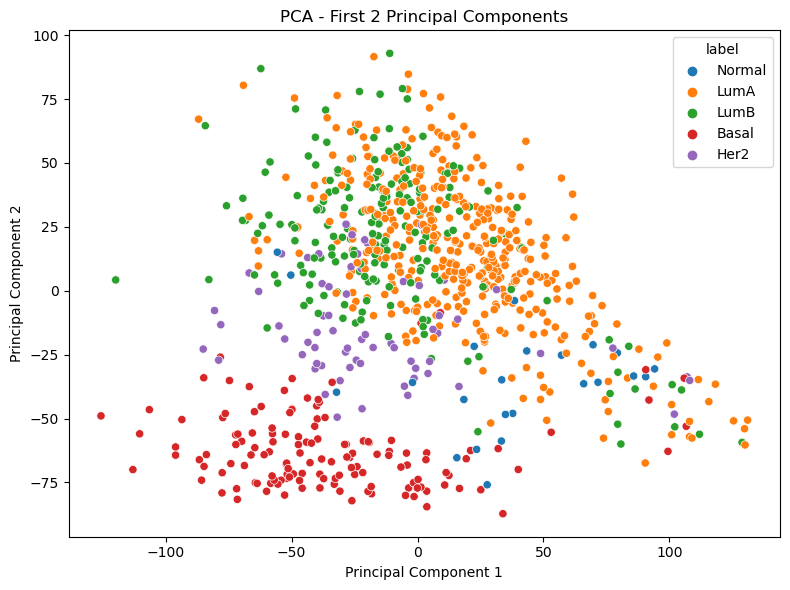

In [72]:
# PCA on gene expression data

X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['age'], errors='ignore')
y = df['PAM50_subtype']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='tab10')
plt.title('PCA - First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

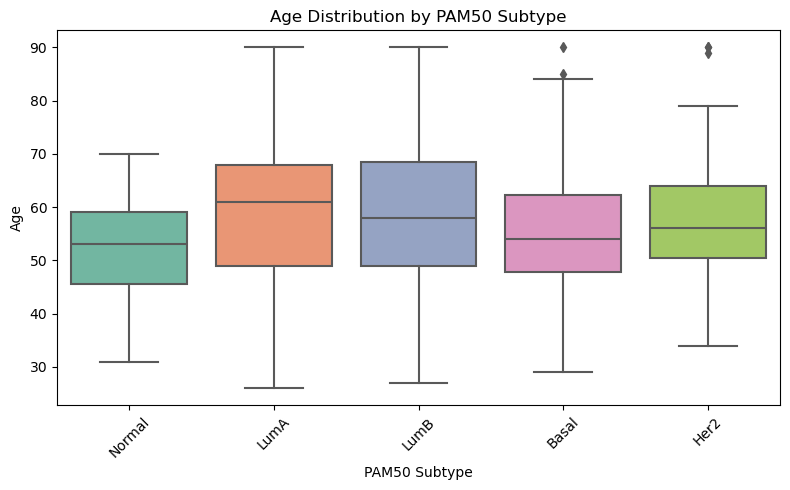

In [73]:
# Boxplot of Age across Subtypes
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='PAM50_subtype', y='age', palette='Set2')
plt.title('Age Distribution by PAM50 Subtype')
plt.ylabel('Age')
plt.xlabel('PAM50 Subtype')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
# Feature Selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Select top 10 features with highest F-score
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y_encoded)
selected_features = X.columns[selector.get_support()]

# Display top features
print("Top 10 selected features (based on F-score):")
print(selected_features.tolist())

Top 10 selected features (based on F-score):
['THSD4', 'GPR77', 'TBC1D9', 'MLPH', 'FOXC1', 'CA12', 'AGR3', 'ESR1', 'C6orf97', 'FOXA1']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   41   144   283   284   297   321   365   565   732   824   825   839
  1077  1100  1188  1255  1256  1259  1338  1363  1364  1367  1399  1425
  1430  1461  1619  1655  1743  1766  1891  1993  1994  2003  2031  2032
  2224  2225  2231  2236  2248  2252  2391  2476  2691  2693  2698  2699
  2733  2889  2903  3039  3048  3049  3076  3079  3273  3284  3288  3425
  3463  3895  3994  4036  4050  4051  4052  4135  4205  4555  4933  5009
  5033  5242  5299  5371  5418  5439  5606  5607  5609  5615  5645  5648
  5755  6030  6049  6051  6118  6125  6147  6323  6324  6825  6852  6855
  6856  7207  7218  7357  7403  7420  7421  7440  7602  7800  7857  7858
  7913  8000  8025  8107  8565  9029  9200  9305  9485  9621  9625  9666
  9755 10262 10315 10458 10464 10502 10527 10528 10530 10585 10605 10608
 10668 10689 10690 10958 10959 10962 10963 10964 10965 10966 10996 10999
 1

Selected top 10 features: ['THSD4', 'GPR77', 'TBC1D9', 'MLPH', 'FOXC1', 'CA12', 'AGR3', 'ESR1', 'C6orf97', 'FOXA1']

Accuracy: 0.7751479289940828

Classification Report:
               precision    recall  f1-score   support

       Basal       0.93      0.93      0.93        28
        Her2       0.77      0.71      0.74        14
        LumA       0.76      0.94      0.84        84
        LumB       0.67      0.42      0.52        38
      Normal       0.00      0.00      0.00         5

    accuracy                           0.78       169
   macro avg       0.62      0.60      0.61       169
weighted avg       0.75      0.78      0.75       169



/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   41   144   283   284   297   321   365   565   732   824   825   839
  1077  1100  1188  1255  1256  1259  1338  1363  1364  1367  1399  1425
  1430  1461  1619  1655  1743  1766  1891  1993  1994  2003  2031  2032
  2224  2225  2231  2236  2248  2252  2391  2476  2691  2693  2698  2699
  2733  2889  2903  3039  3048  3049  3076  3079  3273  3284  3288  3425
  3463  3895  3994  4036  4050  4051  4052  4135  4205  4555  4933  5009
  5033  5242  5299  5371  5418  5439  5606  5607  5609  5615  5645  5648
  5755  6030  6049  6051  6118  6125  6147  6323  6324  6825  6852  6855
  6856  7207  7218  7357  7403  7420  7421  7440  7602  7800  7857  7858
  7913  8000  8025  8107  8565  9029  9200  9305  9485  9621  9625  9666
  9755 10262 10315 10458 10464 10502 10527 10528 10530 10585 10605 10608
 10668 10689 10690 10958 10959 10962 10963 10964 10965 10966 10996 10999
 1

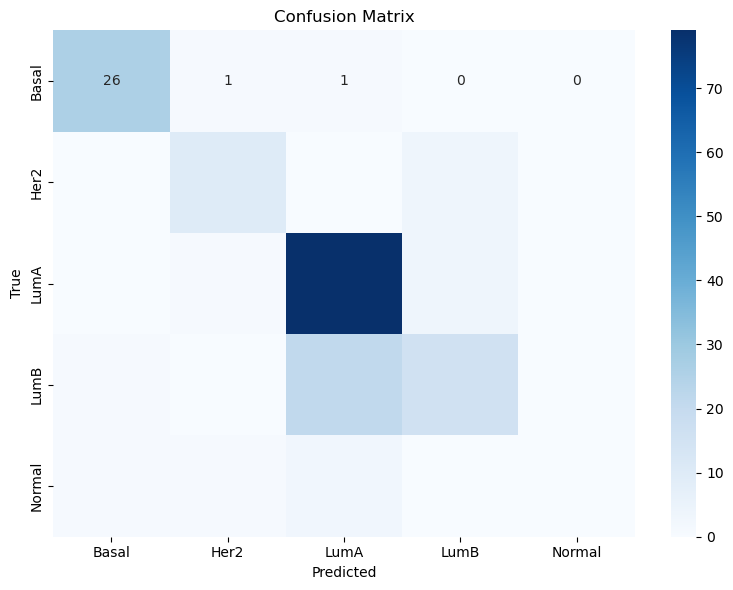

In [75]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Feature Selection: top 10 features using ANOVA F-score
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y_encoded)
selected_features = X.columns[selector.get_support()]
print("Selected top 10 features:", selected_features.tolist())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [77]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y_encoded)
selected_features = X.columns[selector.get_support()]
print("Top 10 Features:", selected_features.tolist())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "SVM (Linear)": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}



Top 10 Features: ['THSD4', 'GPR77', 'TBC1D9', 'MLPH', 'FOXC1', 'CA12', 'AGR3', 'ESR1', 'C6orf97', 'FOXA1']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   41   144   283   284   297   321   365   565   732   824   825   839
  1077  1100  1188  1255  1256  1259  1338  1363  1364  1367  1399  1425
  1430  1461  1619  1655  1743  1766  1891  1993  1994  2003  2031  2032
  2224  2225  2231  2236  2248  2252  2391  2476  2691  2693  2698  2699
  2733  2889  2903  3039  3048  3049  3076  3079  3273  3284  3288  3425
  3463  3895  3994  4036  4050  4051  4052  4135  4205  4555  4933  5009
  5033  5242  5299  5371  5418  5439  5606  5607  5609  5615  5645  5648
  5755  6030  6049  6051  6118  6125  6147  6323  6324  6825  6852  6855
  6856  7207  7218  7357  7403  7420  7421  7440  7602  7800  7857  7858
  7913  8000  8025  8107  8565  9029  9200  9305  9485  9621  9625  9666
  9755 10262 10315 10458 10464 10502 10527 10528 10530 10585 10605 10608
 10668 10689 10690 10958 10959 10962 10963 10964 10965 10966 10996 10999
 1


🧠 Training SVM (Linear)
✅ Accuracy: 0.7751
📋 Classification Report:
              precision    recall  f1-score   support

       Basal       0.93      0.93      0.93        28
        Her2       0.77      0.71      0.74        14
        LumA       0.76      0.94      0.84        84
        LumB       0.67      0.42      0.52        38
      Normal       0.00      0.00      0.00         5

    accuracy                           0.78       169
   macro avg       0.62      0.60      0.61       169
weighted avg       0.75      0.78      0.75       169



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


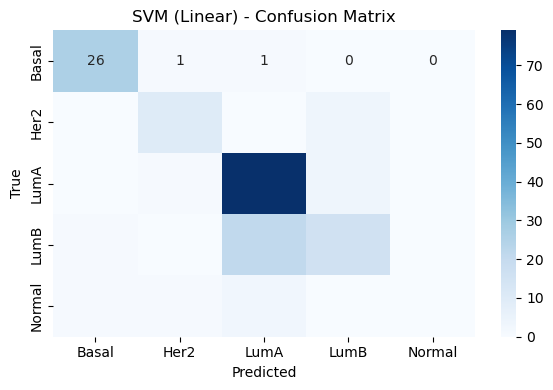


🧠 Training Random Forest


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅ Accuracy: 0.7751
📋 Classification Report:
              precision    recall  f1-score   support

       Basal       0.90      0.96      0.93        28
        Her2       0.71      0.71      0.71        14
        LumA       0.77      0.95      0.85        84
        LumB       0.67      0.37      0.47        38
      Normal       0.00      0.00      0.00         5

    accuracy                           0.78       169
   macro avg       0.61      0.60      0.59       169
weighted avg       0.74      0.78      0.74       169



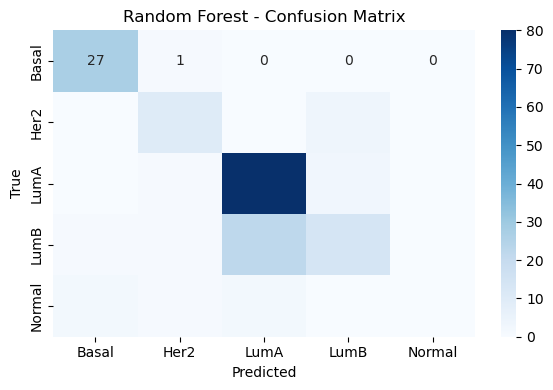


🧠 Training Logistic Regression
✅ Accuracy: 0.7633
📋 Classification Report:
              precision    recall  f1-score   support

       Basal       0.90      0.96      0.93        28
        Her2       0.83      0.71      0.77        14
        LumA       0.76      0.92      0.83        84
        LumB       0.58      0.39      0.47        38
      Normal       0.00      0.00      0.00         5

    accuracy                           0.76       169
   macro avg       0.61      0.60      0.60       169
weighted avg       0.73      0.76      0.74       169



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


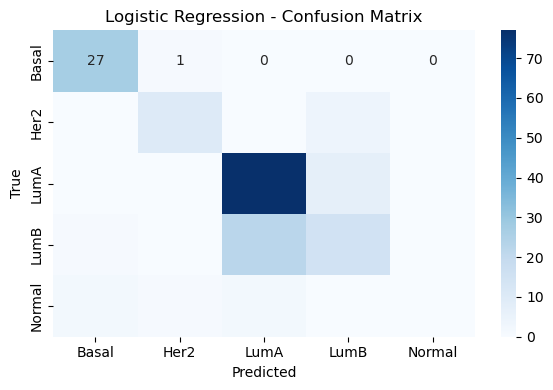


🧠 Training XGBoost


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:17:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7515
📋 Classification Report:
              precision    recall  f1-score   support

       Basal       0.88      1.00      0.93        28
        Her2       0.77      0.71      0.74        14
        LumA       0.76      0.87      0.81        84
        LumB       0.58      0.39      0.47        38
      Normal       0.50      0.20      0.29         5

    accuracy                           0.75       169
   macro avg       0.70      0.64      0.65       169
weighted avg       0.73      0.75      0.73       169



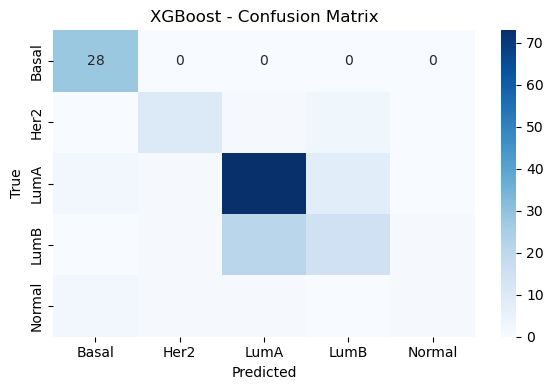

In [78]:
# Train, Predict, Evaluate
for name, model in models.items():
    print(f"\n🧠 Training {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


In [80]:

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_selected, y_encoded, cv=5)
    results.append({
        "Model": name,
        "Test Accuracy": test_acc,
        "CV Mean Accuracy": cv_scores.mean(),
        "CV Std Dev": cv_scores.std()
    })

summary_df = pd.DataFrame(results)
print(summary_df)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

                 Model  Test Accuracy  CV Mean Accuracy  CV Std Dev
0         SVM (Linear)       0.775148          0.743146    0.012462
1        Random Forest       0.775148          0.753853    0.015037
2  Logistic Regression       0.763314          0.752684    0.007779
3              XGBoost       0.751479          0.737208    0.017549


In [82]:
# Define models and parameter grids
param_grids = {
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10, 20]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ['liblinear', 'lbfgs']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5],
            "learning_rate": [0.01, 0.1]
        }
    }
}

# Perform GridSearchCV for each model
best_models = []
for name, mp in param_grids.items():
    print(f"\n🔍 Tuning {name}...")
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train_scaled, y_train)
    print("✅ Best Parameters:", clf.best_params_)
    print("📊 Best Cross-Validation Score:", clf.best_score_)
    
    # Evaluate on test set
    y_pred = clf.predict(X_test_scaled)
    print("📋 Test Set Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    best_models.append({
        "Model": name,
        "Best Params": clf.best_params_,
        "CV Accuracy": clf.best_score_,
        "Test Score": clf.score(X_test_scaled, y_test)
    })

# Summary DataFrame
results_df = pd.DataFrame(best_models)
print("\n📈 Grid Search Summary:\n", results_df)



🔍 Tuning SVM...
✅ Best Parameters: {'C': 10, 'kernel': 'rbf'}
📊 Best Cross-Validation Score: 0.7648756218905473
📋 Test Set Classification Report:
              precision    recall  f1-score   support

       Basal       0.90      0.96      0.93        28
        Her2       0.77      0.71      0.74        14
        LumA       0.80      0.94      0.86        84
        LumB       0.70      0.50      0.58        38
      Normal       0.00      0.00      0.00         5

    accuracy                           0.80       169
   macro avg       0.63      0.62      0.62       169
weighted avg       0.77      0.80      0.78       169


🔍 Tuning Random Forest...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅ Best Parameters: {'max_depth': 10, 'n_estimators': 50}
📊 Best Cross-Validation Score: 0.7485019347705915
📋 Test Set Classification Report:
              precision    recall  f1-score   support

       Basal       0.90      0.96      0.93        28
        Her2       0.77      0.71      0.74        14
        LumA       0.74      0.93      0.82        84
        LumB       0.50      0.26      0.34        38
      Normal       0.00      0.00      0.00         5

    accuracy                           0.74       169
   macro avg       0.58      0.57      0.57       169
weighted avg       0.69      0.74      0.70       169


🔍 Tuning Logistic Regression...
✅ Best Parameters: {'C': 1, 'solver': 'lbfgs'}
📊 Best Cross-Validation Score: 0.7530348258706467
📋 Test Set Classification Report:
              precision    recall  f1-score   support

       Basal       0.90      0.96      0.93        28
        Her2       0.83      0.71      0.77        14
        LumA       0.76      0.92      0.83

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

✅ Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
📊 Best Cross-Validation Score: 0.7470646766169156
📋 Test Set Classification Report:
              precision    recall  f1-score   support

       Basal       0.87      0.93      0.90        28
        Her2       0.75      0.64      0.69        14
        LumA       0.75      0.96      0.84        84
        LumB       0.67      0.32      0.43        38
      Normal       0.00      0.00      0.00         5

    accuracy                           0.76       169
   macro avg       0.61      0.57      0.57       169
weighted avg       0.73      0.76      0.72       169


📈 Grid Search Summary:
                  Model                                        Best Params  \
0                  SVM                         {'C': 10, 'kernel': 'rbf'}   
1        Random Forest              {'max_depth': 10, 'n_estimators': 50}   
2  Logistic Regression                        {'C': 1, 'solver': 'lbfgs'}   
3             

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:24:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🎯 Best Model Based on Test Accuracy: SVM


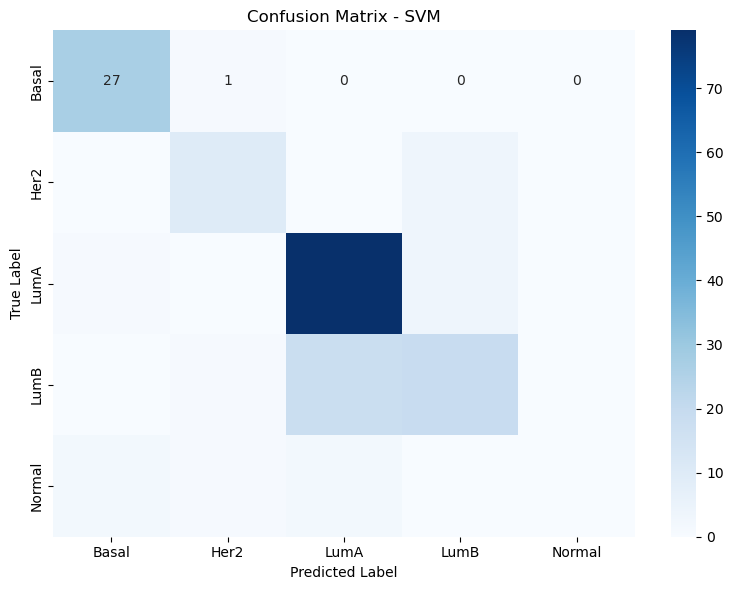

⚠️ Feature importances not available for SVM. Try Random Forest or XGBoost.


In [83]:
# Let's pick the best performing model (highest test score)
best_model_info = max(best_models, key=lambda x: x['Test Score'])
model_name = best_model_info['Model']
print(f"\n🎯 Best Model Based on Test Accuracy: {model_name}")

# Retrieve the best model again
best_clf = GridSearchCV(param_grids[model_name]["model"],
                        param_grids[model_name]["params"],
                        cv=5, scoring='accuracy', n_jobs=-1)
best_clf.fit(X_train_scaled, y_train)
y_pred = best_clf.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - {model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Feature Importances (only for Random Forest or XGBoost)
if model_name in ["Random Forest", "XGBoost"]:
    importances = best_clf.best_estimator_.feature_importances_
    feature_names = X.columns[selector.get_support()]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=importances, y=feature_names)
    plt.title(f"Feature Importances - {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ Feature importances not available for {model_name}. Try Random Forest or XGBoost.")
